# Importing Libraries and loading the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
cars = pd.read_csv("wholedata.csv")

#Set 4 – Car Brands

**Question 1**

Rename all the column names that have spaces into some other names (using underscores). Use this renamed dataframe for your analysis and training.

In [3]:
cars.columns = cars.columns.str.replace(' ','_')
cars.head()

,Brand,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Question 2**

Remove the rows with null values and duplicate rows. Print the shape of the resultant dataframe

In [4]:
#Original Shape
cars.shape 

(11914, 16)

In [5]:
# removing rows with Null values
cars = cars.dropna()

In [6]:
# removing rows with duplicate values
cars = cars.drop_duplicates()

In [7]:
cars.shape

(7735, 16)

**Question 3** 

Add two new columns 'HIGHWAY miles per litre' and 'city miles per litre' from the given columns 'highway MPG' and 'city mpg' and drop those two old columns of mpg


In [8]:
cars["HIGHWAY_miles_per_litre"] = cars['highway_MPG']
cars['city_miles_per_litre'] = cars['city_mpg']
cars = cars.drop(columns=['highway_MPG','city_mpg'])
cars.head()

,Brand,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Popularity,Price,HIGHWAY_miles_per_litre,city_miles_per_litre
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,3916,46135,26,19
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,3916,40650,28,19
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,3916,36350,28,20
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,3916,29450,28,18
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,3916,34500,28,18


**Question 4**

Show the outliers in the target ('Price') using any plot or graph.

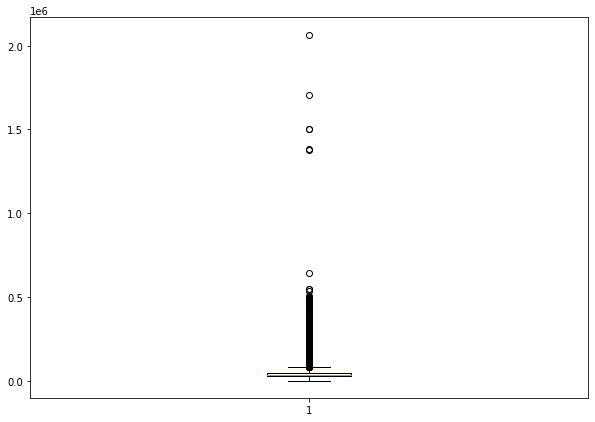

In [9]:
fig = plt.figure(figsize =(10, 7))
data = [cars['Price']]
plt.boxplot(data)
plt.show()

In [10]:
print(cars['Price'].skew())
cars['Price'].describe()

10.332073952922125


count    7.735000e+03
mean     5.102826e+04
std      7.153777e+04
min      2.000000e+03
25%      2.622500e+04
50%      3.560000e+04
75%      4.947750e+04
max      2.065902e+06
Name: Price, dtype: float64

**Question 5**

Remove the outliers(as much as possible) in all numeric fields.


In [11]:
#Removed outlier for Col Engine_Cylinders
min_threshold , max_threshold = cars.Engine_Cylinders.quantile([0.01,0.99])
index_engine = cars[(cars['Engine_Cylinders'] < max_threshold) & (cars['Engine_Cylinders'] < min_threshold)].index
cars.drop(index_engine,inplace=True)

In [12]:
#Removed outlier for Col Price
min_threshold , max_threshold = cars.Price.quantile([0.001,0.999])
index_engine = cars[(cars['Price'] < max_threshold) & (cars['Price'] < min_threshold)].index
cars.drop(index_engine,inplace=True)

In [13]:
#Removed outlier for Col Popularity
min_threshold , max_threshold = cars.Popularity.quantile([0.01,0.99])
index_engine = cars[(cars['Popularity'] < max_threshold) & (cars['Popularity'] < min_threshold)].index
cars.drop(index_engine,inplace=True)

In [14]:
cars.shape

(7688, 16)

**Question 6**

Print the correlation matrix(for numeric columns alone).
 Print the column name(with numeric values) that is highly correlated to the target(response variable-'Price')

In [15]:
corr_matrix = cars.corr().abs()
corr_matrix

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,Popularity,Price,HIGHWAY_miles_per_litre,city_miles_per_litre
Year,1.000000,0.232077,0.054230,0.186970,0.125418,0.124069,0.235443,0.216053
Engine_HP,0.232077,1.000000,0.811643,0.213463,0.033943,0.656061,0.489650,0.593351
Engine_Cylinders,0.054230,0.811643,1.000000,0.192088,0.009586,0.592884,0.601057,0.668664
Number_of_Doors,0.186970,0.213463,0.192088,1.000000,0.042519,0.192879,0.113381,0.167791
Popularity,0.125418,0.033943,0.009586,0.042519,1.000000,0.055515,0.032859,0.036719
Price,0.124069,0.656061,0.592884,0.192879,0.055515,1.000000,0.273827,0.319884
HIGHWAY_miles_per_litre,0.235443,0.489650,0.601057,0.113381,0.032859,0.273827,1.000000,0.780120
city_miles_per_litre,0.216053,0.593351,0.668664,0.167791,0.036719,0.319884,0.780120,1.000000


In [16]:
print("Engine_HP " + "is Highly Correlated to target Price with",corr_matrix.iloc[2,5])

Engine_HP is Highly Correlated to target Price with 0.5928837780449191


**Question 7**

Print the crosstab of 'Transmission Type' and 'Vechile Size'

In [17]:
cross_data = [cars['Transmission_Type'],cars['Vehicle_Size']]
pd.crosstab(cross_data,columns=['Transmission Type','Vehicle_Size'])

col_0                          Transmission Type
col_1                               Vehicle_Size
Transmission_Type Vehicle_Size                  
AUTOMATED_MANUAL  Compact                    361
                  Large                       37
                  Midsize                    140
AUTOMATIC         Compact                   1240
                  Large                     1751
                  Midsize                   2610
DIRECT_DRIVE      Midsize                      2
MANUAL            Compact                   1205
                  Large                       51
                  Midsize                    288
UNKNOWN           Midsize                      3

**Question 8**

The column 'Market Category' is a multi-valued feature in the form of strings separated by comma(,). Process the column 
into a separate dataframe by spliting at comma(,) and present as ANY form of graph or plot to show visually (count of cars vs market category name)
(Example : You can use bar graph)


In [18]:
temp = pd.DataFrame(cars.Market_Category.str.split(',').tolist(),index=cars.Brand).stack()
temp = temp.reset_index([0,"Brand"])
temp.columns = ["Brand" ,"Category"]

In [19]:
count_Items = temp.groupby("Category").count()

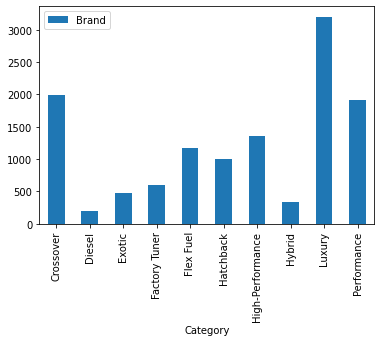

In [20]:
count_Items.plot.bar()

**Question 9**

Make a separate dataframe with the column 'Transmission Type' alone. Remove the UNKNOWN values. Make a Pie chart.


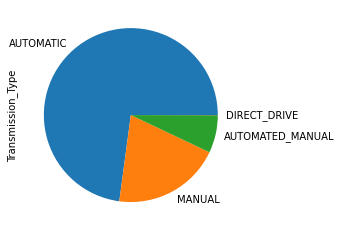

In [21]:
temp2 = pd.DataFrame(cars.Transmission_Type)
temp2 = temp2[temp2.Transmission_Type != 'UNKNOWN']
x = temp2.Transmission_Type.value_counts()
x.plot.pie()

**Question 10**
Make a bar graph showing the count of cars sold by top 5 brands of the year 2000

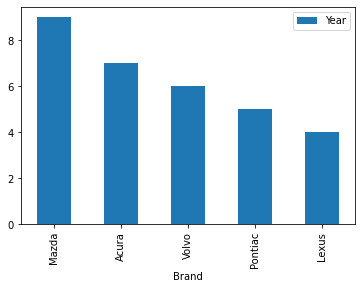

In [22]:
brands = cars[cars["Year"]==2000].groupby("Brand").count()
brands.drop(brands.columns.difference(['Year']), 1, inplace=True)
brands.sort_values("Year",ascending=False,inplace=True)
brands = brands.head()
brands.plot.bar()

#Training the Dataset 

In [23]:
y = cars.Price
X = cars.drop(columns=["Price",'Brand',	'Model','Engine_Fuel_Type','Transmission_Type','Driven_Wheels','Market_Category','Vehicle_Size','Vehicle_Style'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,Popularity,HIGHWAY_miles_per_litre,city_miles_per_litre
6625,2017,560.0,8.0,2.0,3916,22,15
11169,2016,430.0,8.0,2.0,259,21,14
8410,2015,306.0,6.0,2.0,454,26,19
7011,2004,138.0,4.0,2.0,2031,29,23
1460,2009,500.0,8.0,4.0,520,14,10
...,...,...,...,...,...,...,...
7895,2017,523.0,8.0,4.0,238,22,15
8267,2017,240.0,4.0,2.0,258,28,20
1035,2016,170.0,4.0,2.0,3105,35,24
11827,2017,106.0,4.0,2.0,2031,36,30


In [24]:
model = LinearRegression()

In [25]:
model = model.fit(X_train,y_train)

# Accuracy Score

In [26]:
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

51.89273210888341 %
